<a href="https://colab.research.google.com/github/donnadietz/DonnasNotes/blob/master/pysheaf_example_3_two_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DD pysheaf example/s 3  TWO EYES, One "moving" car (t=0,1,2 implied at V0,V1,V2)
March 29, 2024
[Added By Nao T. https://www.youtube.com/watch?v=joypQjO1ZX4 - youtube video mentioned in Donna's video]

In [ ]:
!git clone https://github.com/kb1dds/pysheaf.git
!pip install pysheaf/

Cloning into 'pysheaf'...
remote: Enumerating objects: 1174, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1174 (delta 8), reused 15 (delta 7), pack-reused 1155
Receiving objects: 100% (1174/1174), 877.26 KiB | 9.33 MiB/s, done.
Resolving deltas: 100% (751/751), done.
Processing ./pysheaf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.2 MB/s eta 0:00:00
  Created wheel for pysheaf: filename=pysheaf-0.3.1-py3-none-any.whl size=26306 sha256=52738d8ed6d5142fd5109bafb4e31c59b8ceff44939e89a316945b485b8e3e4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rgnxk2e4/wheels/da/21/db/aab562b5fd8399716a0c527ab0ceceda34bbebe719ae382e4e
Successfully built pysheaf


In [ ]:
#Obligatory imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pysheaf as ps

In [ ]:
#Define the sheaf cells/nodes
shf=ps.Sheaf()
shf.mNumpyNormType = 2
shf.AddCell('v0',ps.Cell('real2',dataDimension=2)) # default dataDimension=1  v=vehicle
shf.AddCell('v2',ps.Cell('real2',dataDimension=2))
shf.AddCell('OS0',ps.Cell('real',dataDimension=1)) #oculus sinister
shf.AddCell('OD0',ps.Cell('real',dataDimension=1)) #oculus dexter
shf.AddCell('OS2',ps.Cell('real',dataDimension=1)) #oculus sinister
shf.AddCell('OD2',ps.Cell('real',dataDimension=1)) #oculus dexter


In [ ]:
#Add edges/arcs/Cofaces
#"Contants" but coded as variables. Be sure not to change them!!!
OSx, OSy = -1, 0
ODx, ODy =  1, 0

In [ ]:
#weight only needed once b/c we have 2 types of metrics (angles, distances)
wt=1
#Start with wt=1, then change as desired.

In [ ]:
shf.AddCoface('v0','OS0',ps.Coface('real2','real',lambda v0xy : wt*np.arctan2(v0xy[1]-OSy, v0xy[0]-OSx) ))
shf.AddCoface('v0','OD0',ps.Coface('real2','real',lambda v0xy : wt*np.arctan2(v0xy[1]-ODy, v0xy[0]-ODx) ))
shf.AddCoface('v2','OS2',ps.Coface('real2','real',lambda v2xy : wt*np.arctan2(v2xy[1]-OSy, v2xy[0]-OSx) ))
shf.AddCoface('v2','OD2',ps.Coface('real2','real',lambda v2xy : wt*np.arctan2(v2xy[1]-ODy, v2xy[0]-ODx) ))


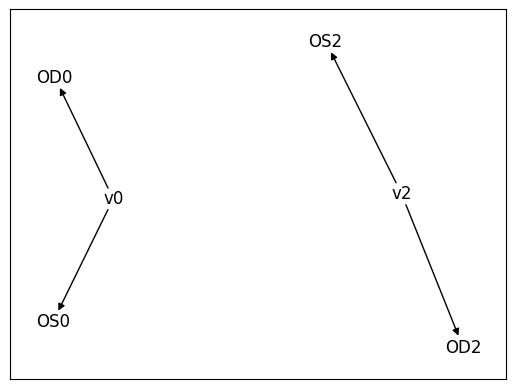

In [ ]:
#Make a plot hopefully
pos=nx.layout.spring_layout(shf)
nx.draw_networkx_labels(shf,pos)
nx.draw_networkx_edges(shf,pos)
plt.show()

In [ ]:
#Put data on the cells - things you know on this round.... and bogus if not... scipy wants it in its optimizer

shf.GetCell('OS0').SetDataAssignment(ps.Assignment('real', wt*1.8314)) #experienced angles, don't optimize this!
shf.GetCell('OD0').SetDataAssignment(ps.Assignment('real', wt*1.9513)) #experienced angles, don't optimize this!
shf.GetCell('OS2').SetDataAssignment(ps.Assignment('real', wt*0.4266)) #experienced angles, don't optimize this!
shf.GetCell('OD2').SetDataAssignment(ps.Assignment('real', wt*0.5071)) #experienced angles, don't optimize this!

shf.GetCell('v0').SetDataAssignment(ps.Assignment('real2', np.array([0, 8]))) # (-5,15) expected solution
shf.GetCell('v2').SetDataAssignment(ps.Assignment('real2', np.array([0, 0]))) # (10, 5) expected solution


In [ ]:
#Maximally Extend all cells
shf.MaximallyExtendCell('OS0')
shf.MaximallyExtendCell('OD0')
shf.MaximallyExtendCell('OS2')
shf.MaximallyExtendCell('OD2')
shf.MaximallyExtendCell('v0')
shf.MaximallyExtendCell('v2')

In [ ]:
print("Starting Consistency Radius: "+str(shf.ComputeConsistencyRadius()) )  #Starting point


Starting Consistency Radius: 2.7085687038128263


In [ ]:
shf.GetCell('v0').mOptimizationCell = True
shf.GetCell('v2').mOptimizationCell = True
#default, rest are false


In [ ]:
shf.FuseAssignment()
for nd in shf.nodes():
    print('Value at {} is {}'.format(nd,shf.GetCell(nd).mDataAssignment))
print('Consistency Radius: '+str(shf.ComputeConsistencyRadius()) )


Value at v0 is [-4.99996639 14.99987736]
Value at v2 is [9.99371412 4.99655103]
Value at OS0 is 1.8314
Value at OD0 is 1.9513
Value at OS2 is 0.4266
Value at OD2 is 0.5071
Consistency Radius: 1.7675229709638253e-05


In [ ]:
print("Recall: Expected v0=(-5,15) and v2=(10,5) CR~0")


Recall: Expected v0=(-5,15) and v2=(10,5) CR~0
